
Distribución de géneros según número de genomas:

N_genomes
1      1219
2       337
3       137
4        79
5        62
6        37
7        25
8        14
9        14
10        9
11        5
12       12
13       11
14        7
15        2
16        6
17        4
18        9
20        5
21        2
22        2
23        1
24        2
25        1
28        2
29        2
30        3
32        1
34        2
35        1
38        1
39        1
45        2
49        1
50        1
57        1
63        1
65        1
68        1
70        1
78        1
81        2
94        1
97        2
99        1
106       1
130       1
168       1
Name: count, dtype: int64

Distribución agrupada:

grupo
1 genoma       1219
2 genomas       337
≥5 genomas      262
3-4 genomas     216
Name: count, dtype: int64


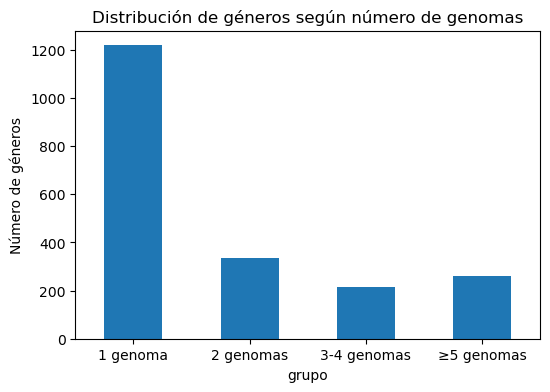

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar tabla resumen de géneros
ruta = "/home/alumno08/TFM/fase2/9_correciones_modelo/resumen_por_genus.tsv"  
df = pd.read_csv(ruta, sep="\t")

# Tabla resumen: contar géneros según número de genomas
df_distrib = df['N_genomes'].value_counts().sort_index()
print("\nDistribución de géneros según número de genomas:\n")
print(df_distrib)

# Agrupación personalizada
df['grupo'] = df['N_genomes'].apply(
    lambda x: '1 genoma' if x == 1 else
              '2 genomas' if x == 2 else
              '3-4 genomas' if x in [3, 4] else
              '≥5 genomas'
)

# Tabla de resumen por grupos
df_resumen_grupos = df['grupo'].value_counts()
print("\nDistribución agrupada:\n")
print(df_resumen_grupos)

# Visualización en gráfico de barras
plt.figure(figsize=(6,4))
df_resumen_grupos.loc[['1 genoma', '2 genomas', '3-4 genomas', '≥5 genomas']].plot(kind="bar")
plt.title("Distribución de géneros según número de genomas")
plt.ylabel("Número de géneros")
plt.xticks(rotation=0)
plt.show()

In [2]:
import pandas as pd

# Cargar la tabla resumen de géneros con número de genomas
ruta_resumen_genus = "/home/alumno08/TFM/fase2/9_correciones_modelo/resumen_por_genus.tsv" 
df_resumen = pd.read_csv(ruta_resumen_genus, sep="\t")

# Filtrar géneros con 1 o 2 genomas
generos_pocos_genomas = df_resumen[df_resumen["N_genomes"] <= 2]["Genus"].unique()

# Cargar la tabla con la taxonomía completa
ruta_predicciones = "/home/alumno08/TFM/fase2/9_correciones_modelo/predicciones_completas_con_avisos.tsv"  
df_pred = pd.read_csv(ruta_predicciones, sep="\t")

# Filtrar las filas cuyo Genus está en la lista de géneros con pocos genomas
df_familias = df_pred[df_pred["Genus"].isin(generos_pocos_genomas)]

# Contar en qué familias se encuentran esos géneros
distribucion_familias = df_familias["Family"].value_counts()

print("\nDistribución de géneros con 1 o 2 genomas por familia:\n")
print(distribucion_familias)


Distribución de géneros con 1 o 2 genomas por familia:

Family
Atkinsviridae       631
Fiersviridae        115
Steitzviridae        59
Kyanoviridae         58
Schitoviridae        51
                   ... 
Mktvariviridae        1
Naomviridae           1
Arenbergviridae       1
Aggregaviridae        1
Helgolandviridae      1
Name: count, Length: 80, dtype: int64


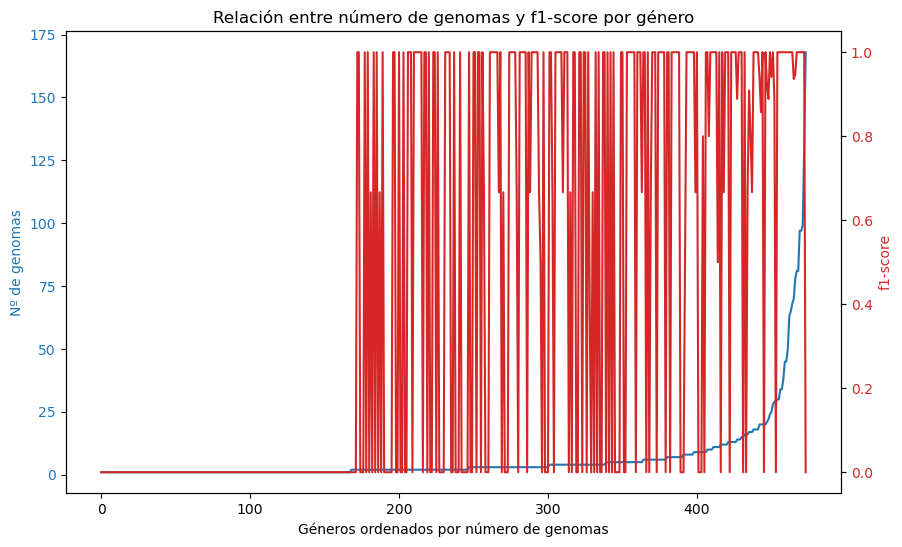

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar tabla combinada con N_genomes y f1-score
ruta = "/home/alumno08/TFM/fase2/9_correciones_modelo/resumen_genus_con_fscore.tsv" 
df = pd.read_csv(ruta, sep="\t")

# Eliminar géneros sin f1-score
df_validos = df[df['f1-score'].notna()]

# Ordenar por N_genomes
df_ordenado = df_validos.sort_values(by='N_genomes').reset_index(drop=True)

# Crear gráfico combinado
fig, ax1 = plt.subplots(figsize=(10,6))

# Eje 1: número de genomas
ax1.plot(df_ordenado.index, df_ordenado['N_genomes'], color='tab:blue', label='Nº genomas')
ax1.set_xlabel("Géneros ordenados por número de genomas")
ax1.set_ylabel("Nº de genomas", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Eje 2: f1-score
ax2 = ax1.twinx()
ax2.plot(df_ordenado.index, df_ordenado['f1-score'], color='tab:red', label='f1-score')
ax2.set_ylabel("f1-score", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Relación entre número de genomas y f1-score por género")
plt.show()


--- N_genomes ---
Mediana bien clasificados: 5.00
Mediana mal clasificados: 1.00
p-valor (Mann-Whitney): 0.0000


/tmp/ipykernel_553470/3481779100.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_validos['grupo'] = df_validos['f1-score'].apply(lambda x: 'Bien clasificados (f1>0.7)' if x > 0.7 else 'Mal clasificados (f1≤0.7)')


<Figure size 600x400 with 0 Axes>

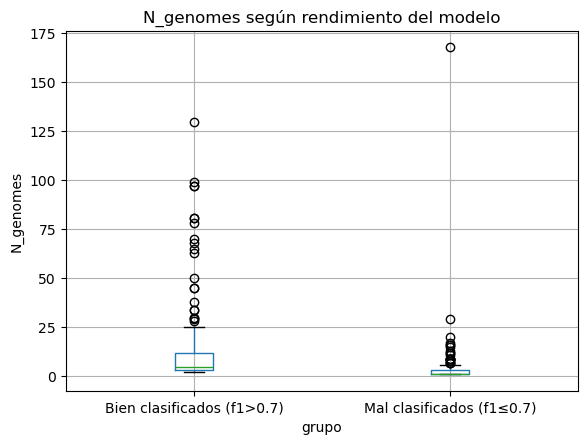


--- N_conserved_PHROGs_>80% ---
Mediana bien clasificados: 45.00
Mediana mal clasificados: 34.00
p-valor (Mann-Whitney): 0.0000


<Figure size 600x400 with 0 Axes>

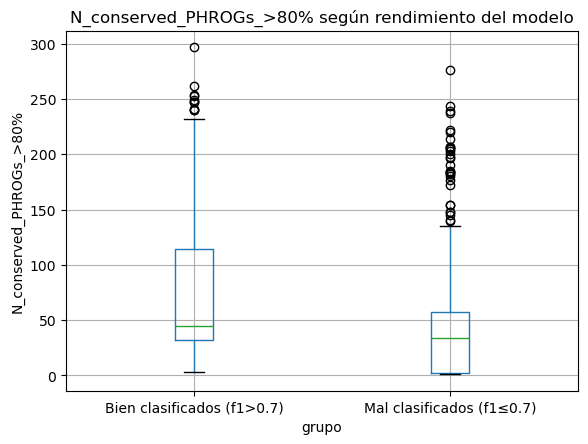


--- N_exclusive_PHROGs ---
Mediana bien clasificados: 4.00
Mediana mal clasificados: 0.00
p-valor (Mann-Whitney): 0.0000


<Figure size 600x400 with 0 Axes>

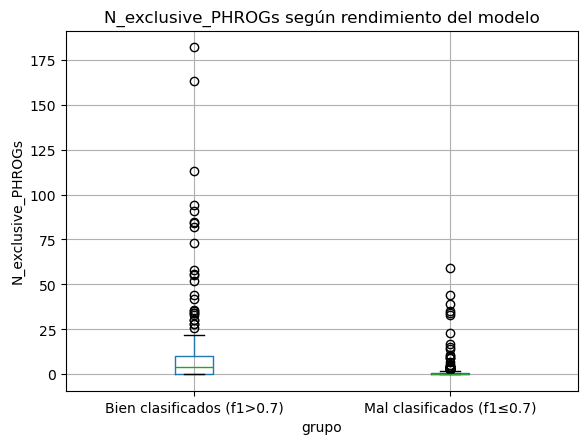

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Cargar tabla combinada
ruta = "/home/alumno08/TFM/fase2/9_correciones_modelo/resumen_genus_con_fscore.tsv"  
df = pd.read_csv(ruta, sep="\t")

# Filtrar géneros con f1-score disponible
df_validos = df[df['f1-score'].notna()]

# Crear columna de grupo según f1-score
df_validos['grupo'] = df_validos['f1-score'].apply(lambda x: 'Bien clasificados (f1>0.7)' if x > 0.7 else 'Mal clasificados (f1≤0.7)')

# Variables a comparar
variables = ['N_genomes', 'N_conserved_PHROGs_>80%', 'N_exclusive_PHROGs']

# Comparación y gráficos
for var in variables:
    print(f"\n--- {var} ---")
    
    # Test estadístico
    grupo_bien = df_validos[df_validos['grupo'] == 'Bien clasificados (f1>0.7)'][var]
    grupo_mal = df_validos[df_validos['grupo'] == 'Mal clasificados (f1≤0.7)'][var]
    
    stat, p = mannwhitneyu(grupo_bien, grupo_mal, alternative='two-sided')
    
    print(f"Mediana bien clasificados: {grupo_bien.median():.2f}")
    print(f"Mediana mal clasificados: {grupo_mal.median():.2f}")
    print(f"p-valor (Mann-Whitney): {p:.4f}")
    
    # Boxplot
    plt.figure(figsize=(6,4))
    df_validos.boxplot(column=var, by='grupo')
    plt.title(f"{var} según rendimiento del modelo")
    plt.suptitle("")
    plt.ylabel(var)
    plt.show()

In [11]:
import pandas as pd

# -------------------
# CARGA DE DATOS
# -------------------

# Tabla de predicciones completas con avisos
df_pred = pd.read_csv("/home/alumno08/TFM/fase2/9_correciones_modelo/predicciones_completas_con_avisos.tsv", sep="\t")

# Tabla de f1-score por Species
df_species = pd.read_csv("/home/alumno08/TFM/fase2/9_correciones_modelo/clasificacion_species_opt.tsv", sep="\t")
df_species.rename(columns={df_species.columns[0]: "Species"}, inplace=True)

# Tabla de f1-score por Genus
df_genus = pd.read_csv("/home/alumno08/TFM/fase2/9_correciones_modelo/clasificacion_genus_opt.tsv", sep="\t")
df_genus.rename(columns={df_genus.columns[0]: "Genus"}, inplace=True)

# -------------------
# FUSIÓN Y CÁLCULOS
# -------------------

# Combinar f1-score species con predicciones completas
df_merged = pd.merge(df_pred, df_species[["Species", "f1-score"]], on="Species", how="left")

# Agrupar por Genus
resumen = df_merged.groupby("Genus").agg(
    N_species=("Species", "count"),
    f1_species_medio=("f1-score", "mean"),
    propor_avisos=("Aviso", lambda x: (x != "").sum() / len(x))  # Proporción de species con aviso
).reset_index()

# Añadir f1-score global del Genus
resumen = pd.merge(resumen, df_genus[["Genus", "f1-score"]], on="Genus", how="left")
resumen.rename(columns={"f1-score": "f1_score_genus"}, inplace=True)

# -------------------
# GUARDADO
# -------------------

resumen.to_csv("/home/alumno08/TFM/fase2/9_correciones_modelo/resumen_genus_species_avisos.tsv", sep="\t", index=False)
print("Resumen guardado en: resumen_genus_species_avisos.tsv")

Resumen guardado en: resumen_genus_species_avisos.tsv


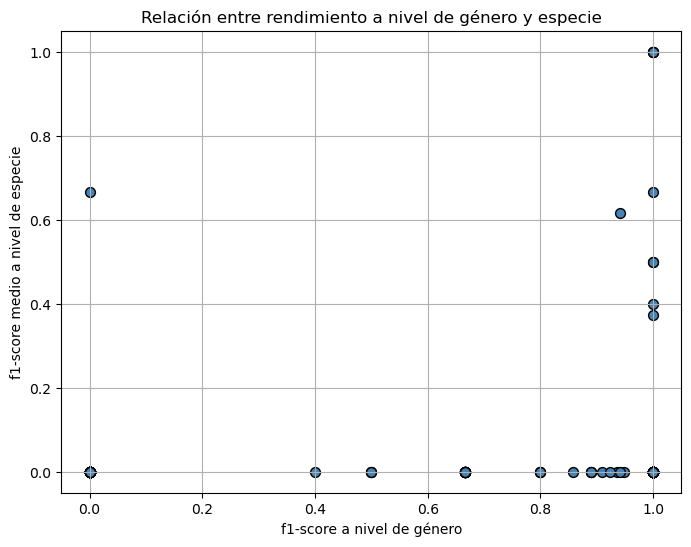

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar tabla resumen
resumen = pd.read_csv("/home/alumno08/TFM/fase2/9_correciones_modelo/resumen_genus_species_avisos.tsv", sep="\t")

# Filtrar filas con f1-score species disponible
df_plot = resumen.dropna(subset=["f1_species_medio"])

# Crear scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(
    df_plot["f1_score_genus"],
    df_plot["f1_species_medio"],
    color="steelblue",
    s=50,
    edgecolor="k"
)

plt.xlabel("f1-score a nivel de género")
plt.ylabel("f1-score medio a nivel de especie")
plt.title("Relación entre rendimiento a nivel de género y especie")
plt.grid(True)
plt.show()

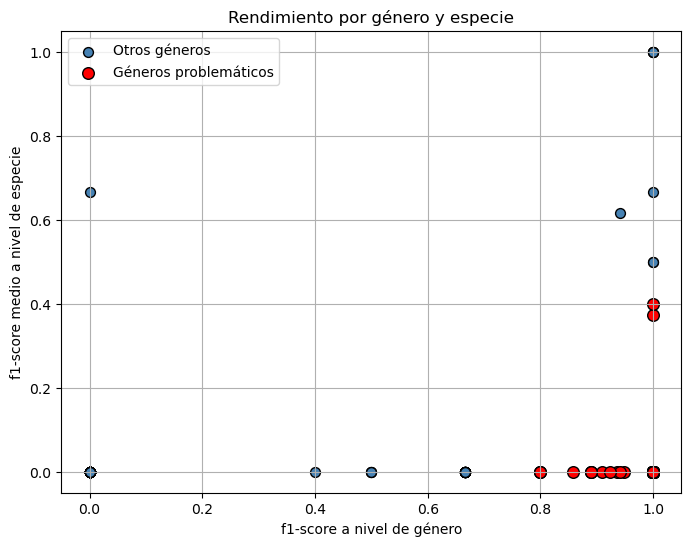

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar tabla resumen
resumen = pd.read_csv("/home/alumno08/TFM/fase2/9_correciones_modelo/resumen_genus_species_avisos.tsv", sep="\t")

# Eliminar filas sin f1-score species medio
df_plot = resumen.dropna(subset=["f1_species_medio"])

# Definir géneros problemáticos
problematicos = df_plot[
    (df_plot["f1_score_genus"] > 0.7) &
    (df_plot["f1_species_medio"] < 0.5)
]

# Crear scatterplot
plt.figure(figsize=(8, 6))

# Puntos en azul (resto)
plt.scatter(
    df_plot["f1_score_genus"],
    df_plot["f1_species_medio"],
    color="steelblue",
    s=50,
    edgecolor="k",
    label="Otros géneros"
)

# Puntos problemáticos en rojo
plt.scatter(
    problematicos["f1_score_genus"],
    problematicos["f1_species_medio"],
    color="red",
    s=70,
    edgecolor="k",
    label="Géneros problemáticos"
)

plt.xlabel("f1-score a nivel de género")
plt.ylabel("f1-score medio a nivel de especie")
plt.title("Rendimiento por género y especie")
plt.grid(True)
plt.legend()
plt.show()

In [18]:
import matplotlib.pyplot as plt
import os

# Crear carpeta si no existe
ruta_guardado = "/home/alumno08/TFM/fase2/9_correciones_modelo"
os.makedirs(ruta_guardado, exist_ok=True)

# Ejemplo de gráfico
plt.figure(figsize=(6,4))
plt.plot([1,2,3,4], [10, 20, 15, 25])
plt.title("Ejemplo de gráfica")
plt.xlabel("X")
plt.ylabel("Y")

# Guardar
ruta_salida = os.path.join(ruta_guardado, "ejemplo_grafica.png")
plt.savefig(ruta_salida, dpi=300, bbox_inches='tight')
plt.close()

print(f"Gráfica guardada en {ruta_salida}")

Gráfica guardada en /home/alumno08/TFM/fase2/9_correciones_modelo/ejemplo_grafica.png


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# -----------------------------
# Crear carpeta si no existe
# -----------------------------
ruta_guardado = "/home/alumno08/TFM/fase2/9_correciones_modelo"
os.makedirs(ruta_guardado, exist_ok=True)

# -----------------------------
# Gráfico 1: Distribución de géneros por número de genomas
# -----------------------------
plt.figure(figsize=(6,4))
df_resumen_grupos.loc[['1 genoma', '2 genomas', '3-4 genomas', '≥5 genomas']].plot(kind="bar")
plt.title("Distribución de géneros según número de genomas")
plt.ylabel("Número de géneros")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f"{ruta_guardado}/distribucion_genomas.png", dpi=300)
plt.close()

# -----------------------------
# Gráfico 2: N_genomes y f1-score por género
# -----------------------------
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(df_ordenado.index, df_ordenado['N_genomes'], color='tab:blue')
ax1.set_xlabel("Géneros ordenados por número de genomas")
ax1.set_ylabel("Nº de genomas", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()
ax2.plot(df_ordenado.index, df_ordenado['f1-score'], color='tab:red')
ax2.set_ylabel("f1-score", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.title("Relación entre número de genomas y f1-score por género")
plt.tight_layout()
plt.savefig(f"{ruta_guardado}/genomas_vs_f1score.png", dpi=300)
plt.close()

# -----------------------------
# Gráfico 3: Boxplots de métricas por rendimiento
# -----------------------------
variables = ['N_genomes', 'N_conserved_PHROGs_>80%', 'N_exclusive_PHROGs']
for var in variables:
    plt.figure(figsize=(6,4))
    df_validos.boxplot(column=var, by='grupo')
    plt.title(f"{var} según rendimiento del modelo")
    plt.suptitle("")
    plt.ylabel(var)
    plt.tight_layout()
    plt.savefig(f"{ruta_guardado}/boxplot_{var}.png", dpi=300)
    plt.close()

# -----------------------------
# Gráfico 4: f1-score género vs especie con puntos problemáticos
# -----------------------------
plt.figure(figsize=(8, 6))
plt.scatter(df_plot["f1_score_genus"], df_plot["f1_species_medio"], color="steelblue", s=50, edgecolor="k", label="Otros géneros")
plt.scatter(problematicos["f1_score_genus"], problematicos["f1_species_medio"], color="red", s=70, edgecolor="k", label="Géneros problemáticos")
plt.xlabel("f1-score a nivel de género")
plt.ylabel("f1-score medio a nivel de especie")
plt.title("Rendimiento por género y especie (géneros problemáticos en rojo)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(f"{ruta_guardado}/rendimiento_genus_species.png", dpi=300)
plt.close()

print(f"Gráficas guardadas en {ruta_guardado}")

Gráficas guardadas en /home/alumno08/TFM/fase2/9_correciones_modelo


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>